<a href="https://colab.research.google.com/github/Willlee0225/nbviewer/blob/master/3_18_%E4%B8%8A%E8%AA%B2%E5%85%A7%E5%AE%B9%E2%80%94%E5%85%A8%E9%80%A3%E7%B5%90%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

%tensorflow_version

Currently selected TF version: 1.x
Available versions:
* 1.x
* 2.x


In [0]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
#讀入MNSIT
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(x_train, y_train), (x_test,y_test)= mnist.load_data()

In [0]:
### 欣賞數據庫內容

In [0]:
len(x_test)

10000

In [0]:
len(x_train)



60000

In [0]:
n=9487

In [0]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
y_train[n]

1

正確答案： 1


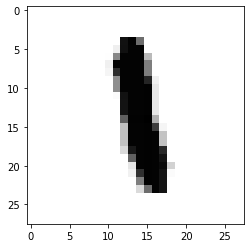

In [0]:
plt.imshow(x_train[n],cmap='Greys')
print('正確答案：',y_train[n])

In [0]:
## 資料整理
##x_train = x_train/100
##x_test = x_test/100

In [0]:
x_train.reshape(60000,784)/255

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
x_train=x_train.reshape(60000,784)/255

In [0]:
x_test=x_test.reshape(10000,784)/255

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train= to_categorical(y_train,10)
y_test= to_categorical(y_test,10)

In [0]:
y_test[87]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
##打造神經網路

In [0]:
from tensorflow.keras.models import Sequential 

In [0]:
from tensorflow.keras.layers import Dense

In [0]:
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Dense(87, input_dim=784, activation='relu'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.add(Dense(87,activation='relu'))

In [0]:
model.add(Dense(10,activation='softmax'))

In [0]:
### 組裝神經網路

In [0]:
model.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                68295     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


In [0]:
784*87+87

68295

In [0]:
## 訓練資料

In [0]:
model.fit(x_train,y_train, batch_size=100, epochs=40)

Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0104 - acc: 0.9346
Epoch 2/40
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0102 - acc: 0.9362
Epoch 3/40
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0100 - acc: 0.9376
Epoch 4/40
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0098 - acc: 0.9384
Epoch 5/40
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0096 - acc: 0.9396
Epoch 6/40
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0095 - acc: 0.9404
Epoch 7/40
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0093 - acc: 0.9416
Epoch 8/40
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0092 - acc: 0.9425
Epoch 9/40
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0090 - acc: 0.9434
Epoch 10/40
60000/60000 [==============================] - 

In [0]:
## 訓練成果


In [0]:
result = model.predict_classes(x_test)


神經五路預測是： 3


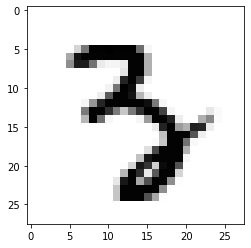

In [0]:
n = 87
print('神經五路預測是：',result[n])
plt.imshow(x_test[n].reshape(28,28),cmap="Greys")